<a href="https://colab.research.google.com/github/Yuumna/Image-Processing/blob/Labs/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name: [  Yumna Ali ]
## ID: [1610334]

# <center><font color=darkred>Lab 5 </font>

# Lab Goals:
    1. Quick overview of some examples in lecture5.
    2. Work with hands-on examples such as: Erosion, Dilation, Opening and closing.

# <font color=darkred size=4>1-Needed Packages

In [0]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
from skimage import data, io
from matplotlib import pyplot as plt
import numpy as np
from skimage import img_as_ubyte,img_as_float
from skimage import data, io, filters
from matplotlib.pyplot import imshow, show, subplot, title, get_cmap
from skimage.segmentation import mark_boundaries, find_boundaries
from skimage.filters import threshold_otsu

### To convert Grayscale Image to Binary image :

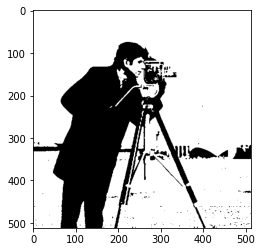

In [0]:
# Use built in function threshold_otsu.

image = data.camera()
thresh = threshold_otsu(image)
binary = image >= thresh
plt.imshow(binary,'gray',vmin=0, vmax=1)

## Image show:

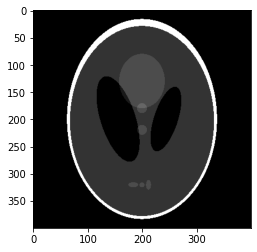

In [0]:
orig_phantom = img_as_ubyte(data.shepp_logan_phantom())
plt.imshow(orig_phantom,'gray',vmin=0, vmax=255)

### Morphological Dilation and Erosion:
    The most basic morphological operations are dilation and erosion. Dilation adds pixels to the boundaries of objects in an image, while erosion removes pixels on object boundaries. The number of pixels added or removed from the objects in an image depends on the size and shape of the structuring element used to process the image. In the morphological dilation and erosion operations, the state of any given pixel in the output image is determined by applying a rule to the corresponding pixel and its neighbors in the input image.

In [0]:
def plot_comparison(original, operation, operation_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax2.imshow(operation, cmap=plt.cm.gray)
    ax2.set_title(operation_name)
    

# Apply Erosion on camera man image.

### Erosion operator:
    - Morphological erosion sets a pixel at (i,j) to the minimum over all pixels in the neighborhood centered at (i,j). 
    - Erosion shrinks bright regions and enlarges dark regions.
    - Erosion can split apart joined objects 
    - Erosion can strip away extrusion 
    - Erosion shrinks objects .
    

### Try to increase the size of the disk and Show the result ?

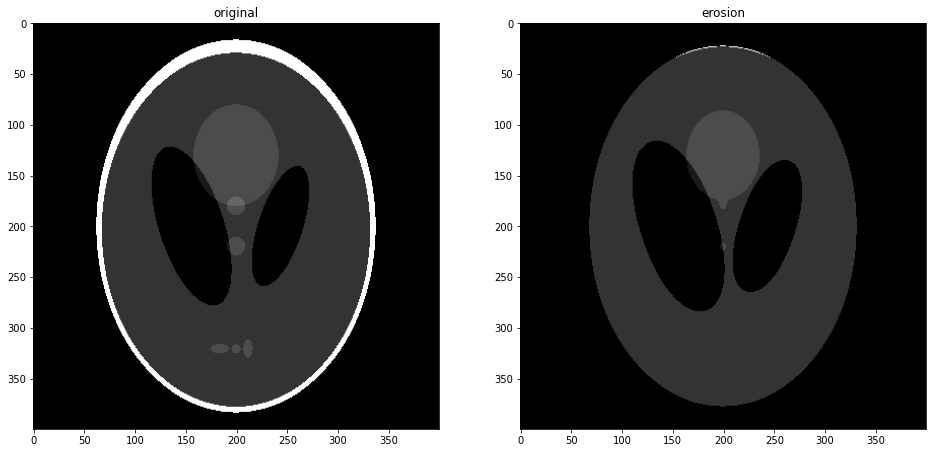

In [0]:
#Erosion:

selem = disk(6)              # disk: To create a circular structuring element with radius 6
eroded = erosion(orig_phantom, selem)
plot_comparison(orig_phantom, eroded, 'erosion')

# Task 1:implement morphological Erosion function on image and the show result?

In [0]:
img = np.arange(18).reshape(3,6)
k2 = np.ones((3,3))
for row in range(img.shape[0]-k.shape[0]+1):
  for col in range(img.shape[1]-k.shape[1]+1):
    kernal_center = k.shape[0]//2,  k.shape[1]//2  
    img[row+kernal_center[0],col+kernal_center[1]]= np.min(img[row:row+k.shape[0],col:col+k.shape[1]]*k.shape[1])
    
img    

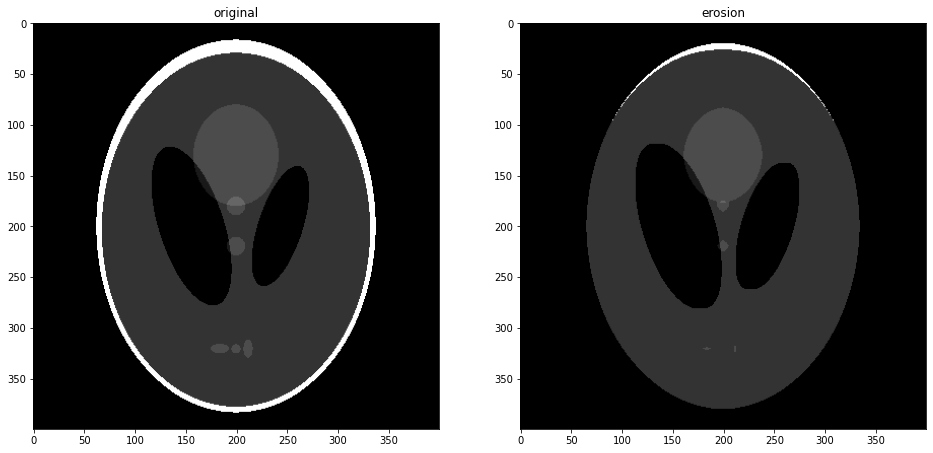

In [0]:
str_elem = np.ones((7,7))
def erosion2(img, k):
  img_new =np.copy(img)
  for row in range(img.shape[0]-k.shape[0]+1):
    for col in range(img.shape[1]-k.shape[1]+1):
      kernal_center = k.shape[0]//2,  k.shape[1]//2  
      img_new[row+kernal_center[0],col+kernal_center[1]]= np.min(img[row:row+k.shape[0],col:col+k.shape[1]]*k)
  return img_new
eroded2 = erosion2(orig_phantom, str_elem)
plot_comparison(orig_phantom, eroded2, 'erosion') 

# Apply Dilation on camera man image.

### Dilation operator:
      - Morphological dilation sets a pixel at (i, j) to the maximum over all pixels in the neighborhood centered at (i, j).         - Dilation enlarges bright regions and shrinks dark regions.
      - Dilation can repair breaks 
      - Dilation can repair intrusions 
      - Dilation enlarges objects .

### What happen when we increase the size of the disk, Write Your observation ?

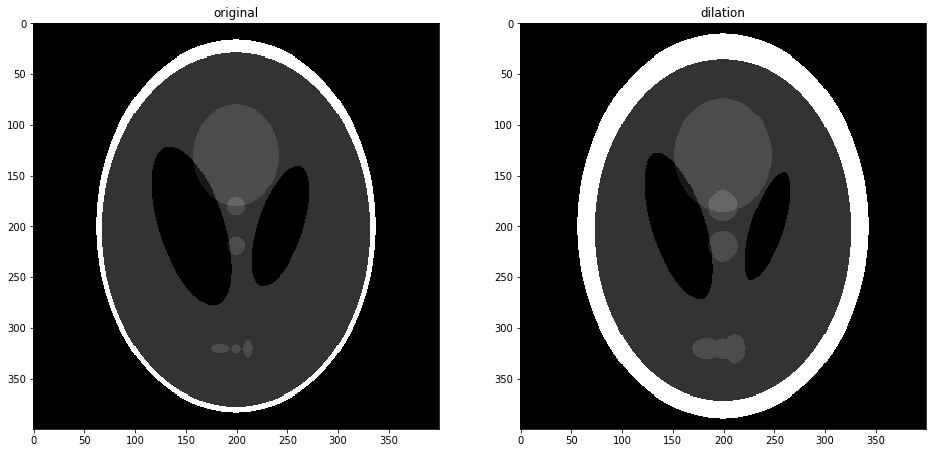

In [0]:
#Dilation:
selem = disk(6)
dilated = dilation(orig_phantom, selem)
plot_comparison(orig_phantom, dilated, 'dilation')

# Task 2:implement morphological Dilation function on image and the show result?

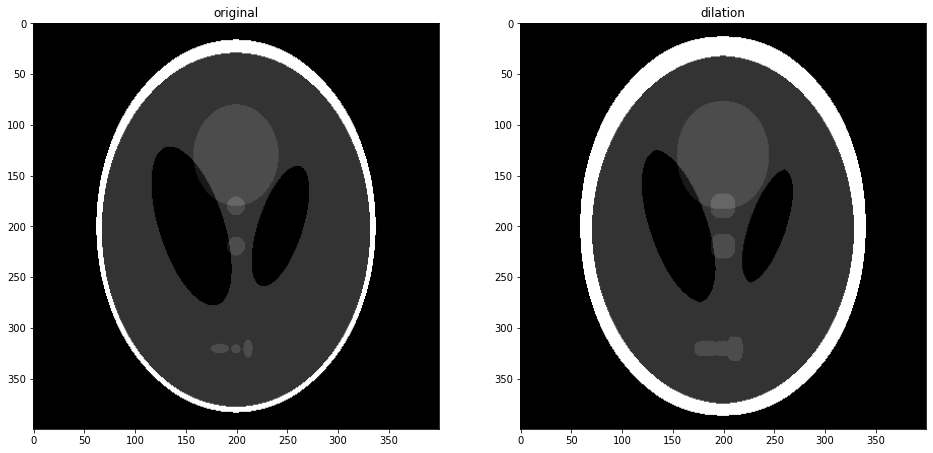

In [0]:

str_elem = np.ones((7,7))
def dilation2(img, k):
  img_new =np.copy(img)
  for row in range(img.shape[0]-k.shape[0]+1):
    for col in range(img.shape[1]-k.shape[1]+1):
      kernal_center = k.shape[0]//2,  k.shape[1]//2  
      img_new[row+kernal_center[0],col+kernal_center[1]]= np.max(img[row:row+k.shape[0],col:col+k.shape[1]]*k)
  return img_new
dilated2 = dilation2(orig_phantom, str_elem)
plot_comparison(orig_phantom, dilated2, 'dilation')

# Apply opening on camera man image.

### Opening operator:
      - The opening operation erodes an image and then dilates the eroded image, using the same structuring element for both operations.Morphological opening is useful for removing small objects from an image while preserving the shape and size of larger objects in the image.
      - Opening can remove small bright spots (i.e. “salt”) and connect small dark cracks.

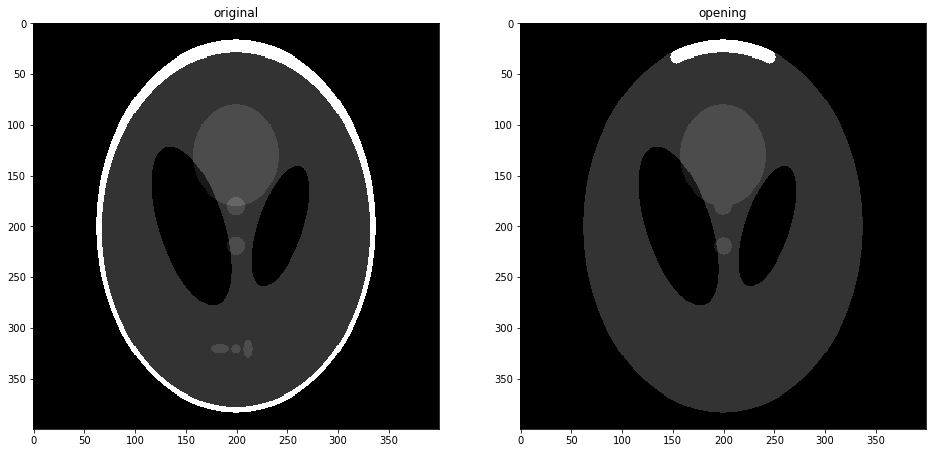

In [0]:
#Opening:
selem = disk(6)
opened = opening(orig_phantom, selem)
plot_comparison(orig_phantom, opened, 'opening')

# Task 3:Implement morphological Opening function on image and show the result?

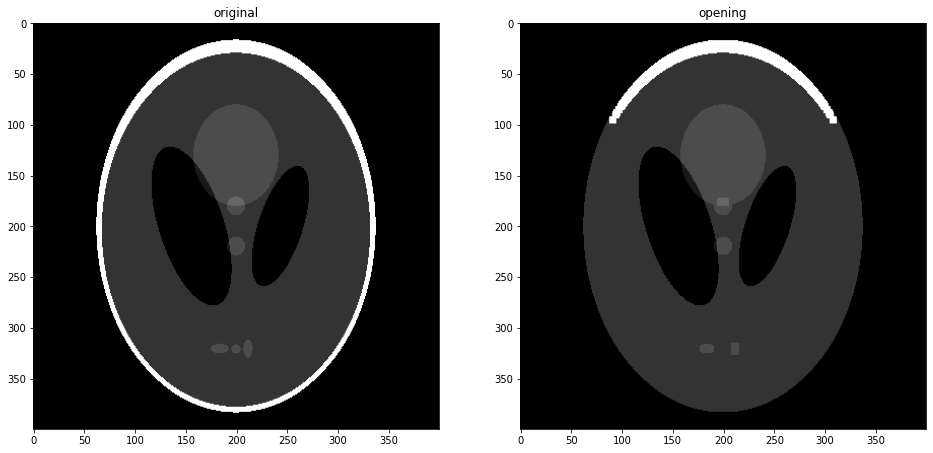

In [0]:
def opening2(img, stelem):
  return dilation2(erosion2(img,stelem), stelem)

opened2 = opening2(orig_phantom, str_elem)
plot_comparison(orig_phantom, opened2, 'opening')




# Apply Closing on camera man image.

### Closing operator:
      - The closing operation dilates an image and then erodes the dilated image, using the same structuring element for both operations.Morphological closing is useful for filling small holes from an image while preserving the shape and size of the objects in the image.
      - Closing can remove small dark spots (i.e. “pepper”) and connect small bright cracks.

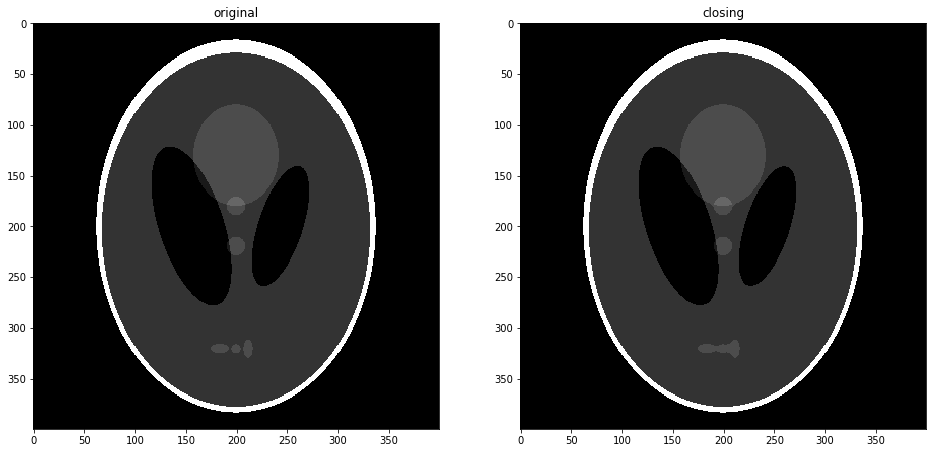

In [0]:
#Closing:
selem = disk(6)
closed = closing(orig_phantom, selem)
plot_comparison(orig_phantom, closed, 'closing')

# Task 4:Implement morphological closing function on image and show the result?

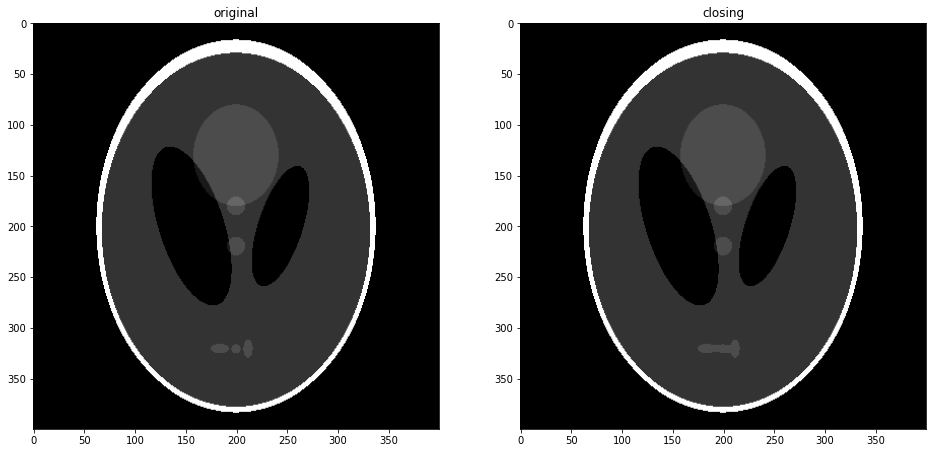

In [0]:
def closing2(img, stelem):
  return erosion2(dilation2(img,stelem), stelem)

closed2 = closing2(orig_phantom, str_elem)
plot_comparison(orig_phantom, closed2, 'closing')